In [2]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
# Import the train_test_learn module
from sklearn.model_selection import train_test_split
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LinearRegression

In [2]:
#Read in the csv file
df_housing = pd.read_csv("Resources/austinHousingData_2021.csv")

#preview the data
df_housing.head()

,zpid,city,streetAddress,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,30.430632,-97.663078,1.98,2,True,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,30.432672,-97.661697,1.98,2,True,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,30.409748,-97.639771,1.98,0,True,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,30.432112,-97.661659,1.98,2,True,True,...,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,30.437368,-97.656860,1.98,0,True,True,...,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg


In [6]:
#Clean the data
#Drop columns that are not needed - zpid, city, streetAddress, parkingSpaces, latest_saledate, latest_salemonth, 
# latest_saleyear, latestPriceSource, numOfParkingFeatures, homeImage

df_clean = df_housing.drop(columns=['zpid', 'city', 'zipcode', 'streetAddress', 'parkingSpaces', 'latest_saledate', 'latest_salemonth',
                            'latest_saleyear', 'latestPriceSource', 'numOfParkingFeatures', 'homeImage'])

df_clean.head()

,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,hasSpa,hasView,...,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
0,30.430632,-97.663078,1.98,2,True,True,True,True,False,False,...,0,1,1,1.266667,2.666667,1063,14,3.0,4,2
1,30.432672,-97.661697,1.98,2,True,True,True,True,False,False,...,0,1,1,1.400000,2.666667,1063,14,2.0,4,1
2,30.409748,-97.639771,1.98,0,True,True,False,True,False,False,...,2,1,1,1.200000,3.000000,1108,14,2.0,3,1
3,30.432112,-97.661659,1.98,2,True,True,True,True,False,False,...,0,1,1,1.400000,2.666667,1063,14,2.0,3,1
4,30.437368,-97.656860,1.98,0,True,True,False,True,False,False,...,0,1,1,1.133333,4.000000,1223,14,3.0,3,2


In [57]:
#Read in the csv file
df_seattle_sales = pd.read_csv("Resources/kingcounty/seattle_sales.csv")

df_seattle_sales.head()



,id,sale_id,pinx,sale_date,sale_price,sale_nbr,sale_warning,join_status,join_year,latitude,...,view_olympics,view_cascades,view_territorial,view_skyline,view_sound,view_lakewash,view_lakesamm,view_otherwater,view_other,submarket
0,1,1999..144,..2734100475,1/5/1999,150000,1,,demo,1999,47.544359,...,0,0,0,0,0,0,0,0,0,E
1,2,1999..660,..6145600690,1/8/1999,164000,1,,demo,1999,47.703824,...,0,0,0,0,0,0,0,0,0,B
2,3,1999..1155,..3438501120,1/19/1999,175000,1,,demo,1999,47.549525,...,0,0,0,0,0,0,0,0,0,F
3,4,1999..1354,..3336001680,1/14/1999,160000,1,,demo,1999,47.526324,...,0,0,0,0,0,0,0,0,0,E
4,5,1999..1424,..7857000705,1/19/1999,135000,1,,demo,1999,47.550687,...,0,0,0,0,0,0,0,0,0,E


In [58]:
# drop id column 
df_seattle_sales = df_seattle_sales.drop(columns=['id'])

# use pandas to create index
df_seattle_sales.reset_index(drop=True)
df_seattle_sales.head()

,sale_id,pinx,sale_date,sale_price,sale_nbr,sale_warning,join_status,join_year,latitude,longitude,...,view_olympics,view_cascades,view_territorial,view_skyline,view_sound,view_lakewash,view_lakesamm,view_otherwater,view_other,submarket
0,1999..144,..2734100475,1/5/1999,150000,1,,demo,1999,47.544359,-122.320786,...,0,0,0,0,0,0,0,0,0,E
1,1999..660,..6145600690,1/8/1999,164000,1,,demo,1999,47.703824,-122.347166,...,0,0,0,0,0,0,0,0,0,B
2,1999..1155,..3438501120,1/19/1999,175000,1,,demo,1999,47.549525,-122.360245,...,0,0,0,0,0,0,0,0,0,F
3,1999..1354,..3336001680,1/14/1999,160000,1,,demo,1999,47.526324,-122.264061,...,0,0,0,0,0,0,0,0,0,E
4,1999..1424,..7857000705,1/19/1999,135000,1,,demo,1999,47.550687,-122.300641,...,0,0,0,0,0,0,0,0,0,E


In [59]:
#list column names for df_seattle_sales

df_seattle_sales.columns

Index(['sale_id', 'pinx', 'sale_date', 'sale_price', 'sale_nbr',
       'sale_warning', 'join_status', 'join_year', 'latitude', 'longitude',
       'area', 'city', 'zoning', 'subdivision', 'present_use', 'land_val',
       'imp_val', 'year_built', 'year_reno', 'sqft_lot', 'sqft', 'sqft_1',
       'sqft_fbsmt', 'grade', 'fbsmt_grade', 'home_condition', 'stories',
       'beds', 'bath_full', 'bath_3qtr', 'bath_half', 'garb_sqft', 'gara_sqft',
       'wfnt', 'golf', 'greenbelt', 'noise_traffic', 'view_rainier',
       'view_olympics', 'view_cascades', 'view_territorial', 'view_skyline',
       'view_sound', 'view_lakewash', 'view_lakesamm', 'view_otherwater',
       'view_other', 'submarket'],
      dtype='object')

<Axes: >

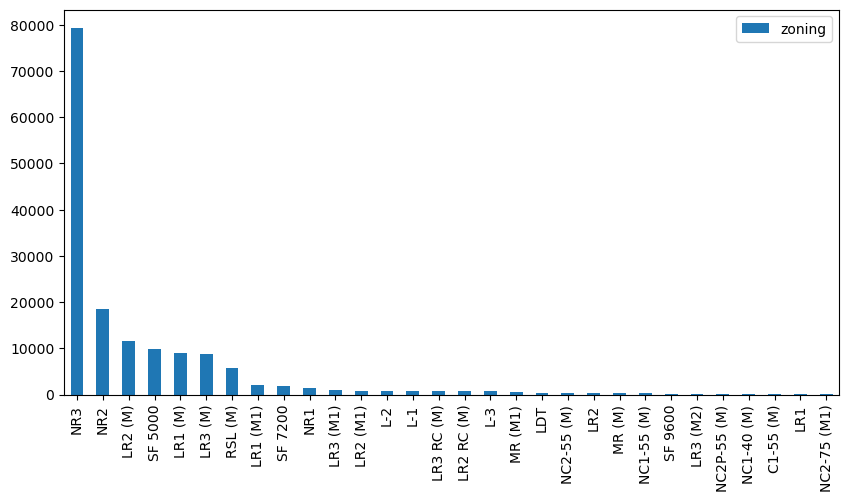

In [60]:
# Look at zoning value counts for seattle sales data
# Zoning codes in King county control the types of housing that can be built on a given plot of land.

zoning = df_seattle_sales['zoning'].value_counts()
zoning_df = pd.DataFrame(zoning)

# plot the zoning data with top 30 zoning types
zoning_df.head(30).plot(kind='bar', figsize=(10,5))

# Zoning codes in King County control the types of housing that can be built in a given area.
Unfotunately, the zoning codes are not consistent. They vary between municipalities within the county and have changed multiple times over the time span of this dataset from 1999 to 2022.

For our analysis we'll focus on single family homes within Seattle and the following zoning codes:
NR1, NR2, NR3, RSL, SF 5000, SF 7200, SF 9600

The dataset should be approximatley 121,000 rows of data.

# NR - neighborhood residential  (single family homes)
Areas characterized by houses, also known as detached single-family dwelling units, on lots of a compatible scale and character. The NR3, NR2, and NR1 zone designations correspond to the minimum lot size required for each single-family dwelling unit.

# SF - Single Family (5000, 7200, 9600) - These are an older zoning codes that is no longer used for new development.
In areas zoned as "SF 5000," you will typically find neighborhoods primarily consisting of single-family homes on individual lots. The zoning is intended to maintain a suburban character and promote low-density residential development. The "5000" in "SF 5000" denotes the minimum required lot area per dwelling unit. It means that a minimum lot size of 5,000 square feet is required for each single-family dwelling within the "SF 5000" zone. The "SF 7200" and "SF 9600" zones are similar, but require a minimum lot size of 7,200 and 9,600 square feet, respectively.

# RSL, Residential Small Lot (RSL)
Areas typified by detached single family structures on lots compatible with the character of single family neighborhoods. The three single family zones vary by minimum lot size required for each single family home. 

# LR, Lowrise (LR1, LR2, LR3)
# These zoning codes are a mix of proptery types and will not be used for our analysis.
The "LR1" zoning allows for lowrise residential development with moderate density. It typically permits a mix of housing types, including single-family homes, duplexes, townhouses, and small apartment buildings.
There are some single family homes/townhomes, but it is difficult to determine which ones are duplexes or apartments.
These will NOT be included in the analysis..